In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image
import imutils

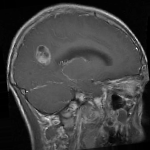

In [2]:
# Working on OpenCV
test_img_bgr = cv2.imread('Test1.png', cv2.IMREAD_COLOR)
test_img_rgb = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2RGB)

Image(filename='Test1.png')

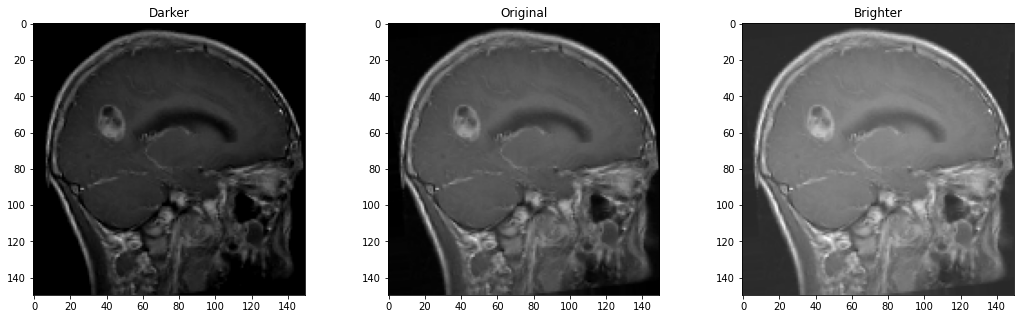

In [3]:
# To be brighter or not to be? It seems good!
matrix = np.ones(test_img_rgb.shape, dtype = "uint8") * 40 

brighter = cv2.add(test_img_rgb, matrix)
darker = cv2.subtract(test_img_rgb, matrix)

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(darker);
plt.title("Darker");
plt.subplot(132); plt.imshow(test_img_rgb);
plt.title("Original");
plt.subplot(133); plt.imshow(brighter);
plt.title("Brighter");

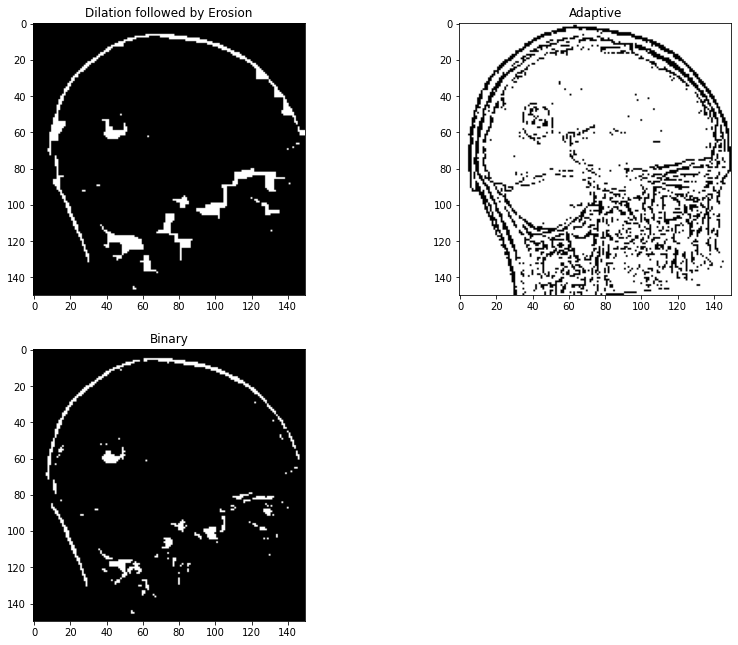

In [130]:
# Thresholding?!? apperently not!
img_read = cv2.imread("Test1.png", cv2.IMREAD_GRAYSCALE)

# Binary 
retval, img_thresh_gbl = cv2.threshold(img_read,130, 255, cv2.THRESH_BINARY)
kernel = np.ones((6,6),np.uint8)
"""Trying different types of thresholding"""
# edged = cv2.erode(img_thresh_gbl, kernel, iterations=1)
# edged = cv2.dilate(img_thresh_gbl, kernel, iterations=1)
# edged = cv2.morphologyEx(img_thresh_gbl, cv2.MORPH_OPEN, kernel)
# edged = cv2.morphologyEx(img_thresh_gbl, cv2.MORPH_GRADIENT, kernel)
edged = cv2.morphologyEx(img_thresh_gbl, cv2.MORPH_CLOSE, kernel)
# Adaptive
img_adaptive_thresh = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)

# Show the images
plt.figure(figsize=[14,11])
plt.subplot(221); plt.imshow(edged, cmap="gray");         
plt.title("Dilation followed by Erosion");
plt.subplot(222); plt.imshow(img_adaptive_thresh, cmap="gray");       
plt.title("Adaptive");
plt.subplot(223); plt.imshow(img_thresh_gbl, cmap="gray");       
plt.title("Binary");

# Contour Detection

Lets detect contours first then detect tumors

In [132]:
img_gray = cv2.imread('Test2.png', cv2.IMREAD_GRAYSCALE)

In [133]:
rbg_img = cv2.imread('Test2.png')

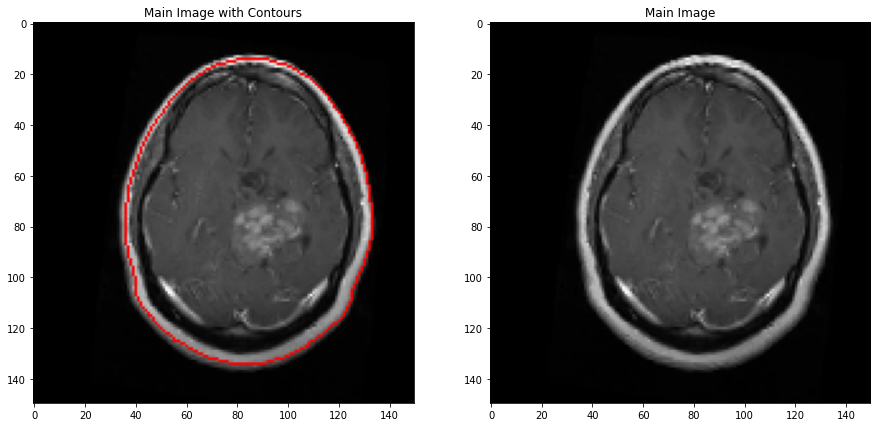

In [135]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 115, 255, cv2.THRESH_BINARY)
edged = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# now find the contours
contours, hierarchy = cv2.findContours(image=edged, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
img_thresh_gbl_copy = img_gray.copy()
cv2.drawContours(image=rbg_img, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=1)

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(rbg_img, cmap='gray');         
plt.title("Main Image with Contours");
plt.subplot(122); plt.imshow(img_thresh_gbl_copy, cmap='gray');       
plt.title("Main Image");

In [136]:
contours

(array([[[ 80,  14]],
 
        [[ 79,  15]],
 
        [[ 78,  15]],
 
        [[ 77,  15]],
 
        [[ 76,  15]],
 
        [[ 75,  16]],
 
        [[ 74,  16]],
 
        [[ 73,  16]],
 
        [[ 72,  16]],
 
        [[ 71,  17]],
 
        [[ 70,  17]],
 
        [[ 69,  18]],
 
        [[ 68,  18]],
 
        [[ 67,  19]],
 
        [[ 66,  20]],
 
        [[ 65,  20]],
 
        [[ 64,  21]],
 
        [[ 63,  22]],
 
        [[ 62,  22]],
 
        [[ 61,  23]],
 
        [[ 60,  24]],
 
        [[ 59,  25]],
 
        [[ 58,  26]],
 
        [[ 57,  27]],
 
        [[ 56,  28]],
 
        [[ 55,  29]],
 
        [[ 54,  30]],
 
        [[ 53,  31]],
 
        [[ 53,  32]],
 
        [[ 52,  33]],
 
        [[ 51,  34]],
 
        [[ 51,  35]],
 
        [[ 50,  36]],
 
        [[ 49,  37]],
 
        [[ 48,  38]],
 
        [[ 48,  39]],
 
        [[ 47,  40]],
 
        [[ 46,  41]],
 
        [[ 46,  42]],
 
        [[ 45,  43]],
 
        [[ 45,  44]],
 
        [[ 44,  

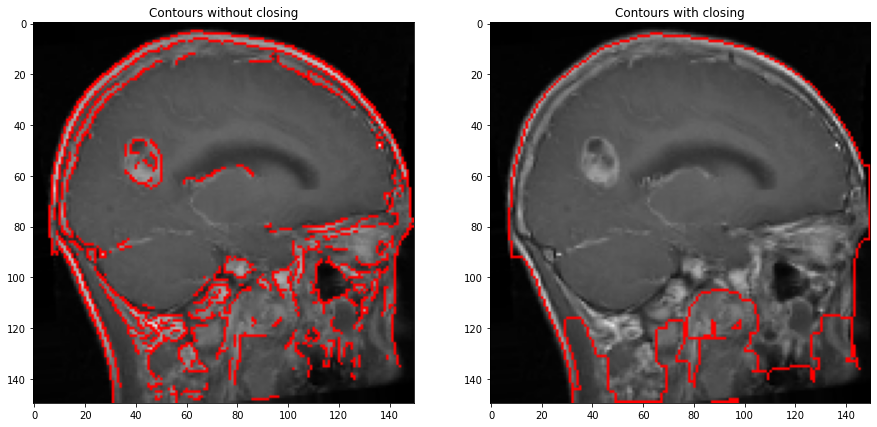

In [139]:
""" Let's load our picture """
image = cv2.imread('Test1.png')
image_ = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged_without = cv2.Canny(gray, 140, 200)
edged = cv2.morphologyEx(edged_without, cv2.MORPH_CLOSE, kernel)

  
""" Finding Contours
    Use a copy of the image
    since findContours alters the image """ 

contours_without, hierarchy_without = cv2.findContours(edged_without, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
""" Draw all contours """
cv2.drawContours(image_, contours_without, -1, (255, 0, 0), 1)
cv2.drawContours(image, contours, -1, (255, 0, 0), 1)  

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(image_, cmap='gray');         
plt.title("Contours without closing");
plt.subplot(122); plt.imshow(image, cmap='gray');       
plt.title("Contours with closing");

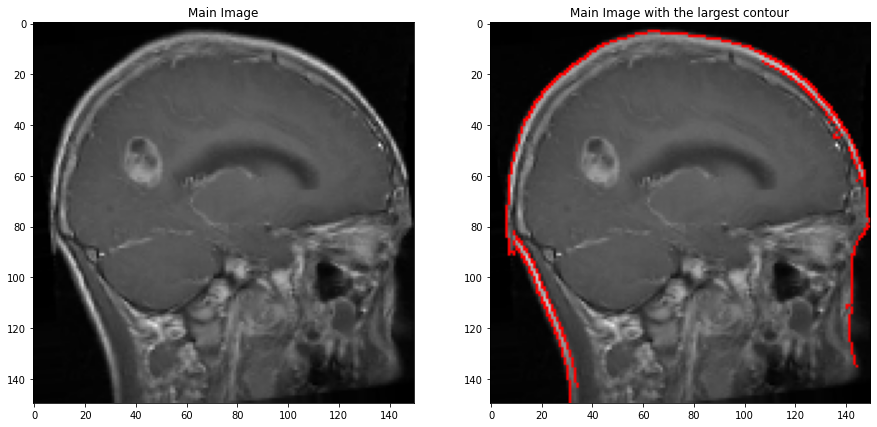

In [18]:
""" Let's load our picture """
image = cv2.imread('Test1.png')
image_ = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 140, 200)
  
""" Finding Contours
    Use a copy of the image
    since findContours alters the image """ 

""" First i need to grab the largest contour area and then draw it on the image """
items = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cnts = items[0] if len(items) == 2 else items[1]
cnts = max(cnts, key=cv2.contourArea)
  
""" Draw all contours """
cv2.drawContours(image, cnts, -1, (255, 0, 0), 1)
  

plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(image_, cmap='gray');         
plt.title("Main Image");
plt.subplot(122); plt.imshow(image, cmap='gray');       
plt.title("Main Image with the largest contour");

In [20]:
"""First i need to grab the largest contour area and then draw it on the image"""
items = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = items[0] if len(items) == 2 else items[1]
cnts = max(cnts, key=cv2.contourArea)
cnts

array([[[62,  3]],

       [[61,  4]],

       [[60,  4]],

       ...,

       [[65,  3]],

       [[64,  3]],

       [[63,  3]]], dtype=int32)

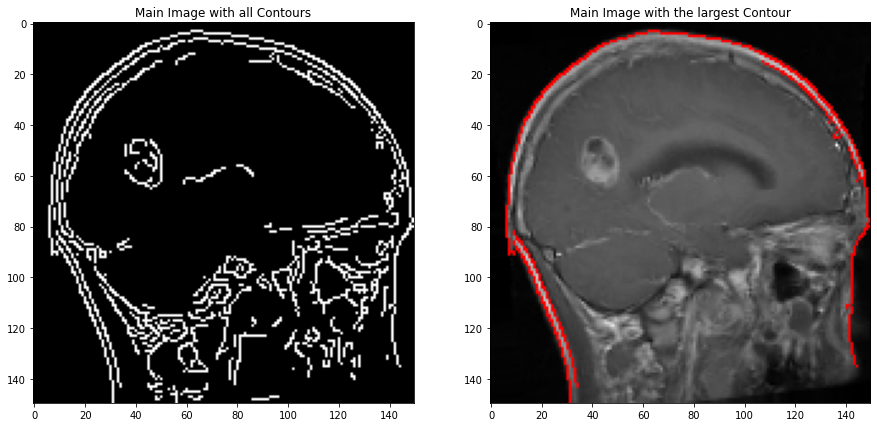

In [24]:
image = cv2.imread('Test1.png')

image_ = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 140, 200)
  
""" Draw all contours """
cv2.drawContours(image, cnts, -1, (255, 0, 0), 1)


plt.figure(figsize=[15,15])
plt.subplot(121); plt.imshow(edged, cmap='gray');         
plt.title("Main Image with all Contours");
plt.subplot(122); plt.imshow(image, cmap='gray');       
plt.title("Main Image with the largest Contour");